In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image as PillowImage
from IPython.display import Image

In [2]:
def sort_digits(n: int, length: int) -> str:
    return ''.join(sorted(str(n).zfill(length)))

def identical_digits(n: int, length: int) -> bool:
    digits = str(n).zfill(length)
    first_digit = digits[0]
    return all( digit == first_digit for digit in digits )

def k(n, length=4):
    ascending = sort_digits(n, length)
    descending = ascending[::-1]

    x = int(ascending)
    y = int(descending)
    
    if x > y:
        return x - y
    else:
        return y - x

def kaprekar(n, length=4, verbose=False):
    i = 0
    while True:
        m = k(n, length)
        if verbose:
            print(i, n)
        if m == n:
            return i, m
        i = i+1
        if i > 100:
            raise Exception(f"maximum iterations exceeded for kaprekar({n})")
        n = m

In [3]:
all_numbers = np.arange(1, 10000)
valid_numbers = np.array([ num for num in all_numbers if not identical_digits(num, 4) ])
sorted_valid_numbers = np.unique(np.array([ int(sort_digits(x, 4)[::-1]) for x in valid_numbers ]))
len(sorted_valid_numbers)

705

In [4]:
assert sort_digits('1234', 4) == '1234'
assert sort_digits('4123', 4) == '1234'
assert sort_digits('999', 4) == '0999'
assert identical_digits(1111, 4)
assert not identical_digits(6174, 4)
assert identical_digits(0, 4)
assert not identical_digits(1, 4)

In [5]:
def kaprekar_iteration_counts(length=4):
    iteration_counts = []
    first_fixed_point = None
    for i in range(1, int(10**length)):
        iterations, fixed_point = kaprekar(i, length)
        if first_fixed_point is None:
            first_fixed_point = fixed_point
        if not identical_digits(i, length) and fixed_point != first_fixed_point:
            print('violation', i, iterations, fixed_point)
        iteration_counts.append(iterations)
    return iteration_counts

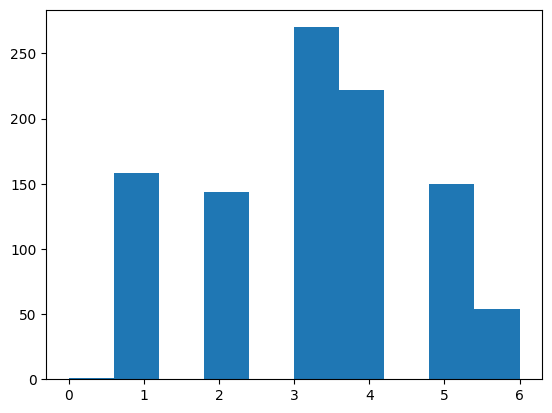

In [6]:
plt.hist(kaprekar_iteration_counts(3));

Counter({3: 2400, 7: 2184, 6: 1656, 5: 1518, 4: 1272, 2: 576, 1: 392, 0: 1})


Text(0, 0.5, 'Count of 4 Digit Numbers')

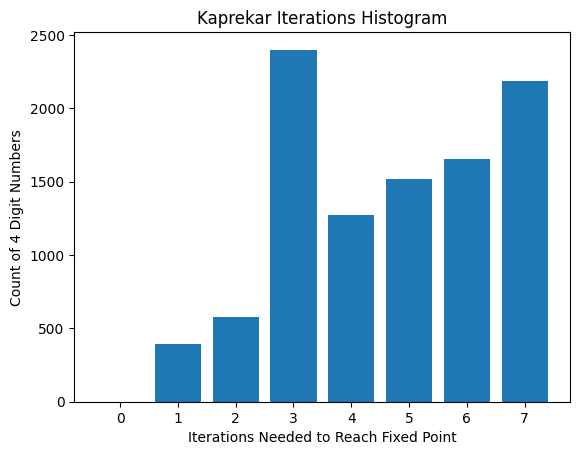

In [7]:
histogram = Counter(kaprekar_iteration_counts(4))
print(histogram)
plt.bar(histogram.keys(), histogram.values())
plt.title("Kaprekar Iterations Histogram")
plt.xlabel("Iterations Needed to Reach Fixed Point")
plt.ylabel("Count of 4 Digit Numbers")

In [9]:
np.mean(kaprekar_iteration_counts(4))

4.665066506650665

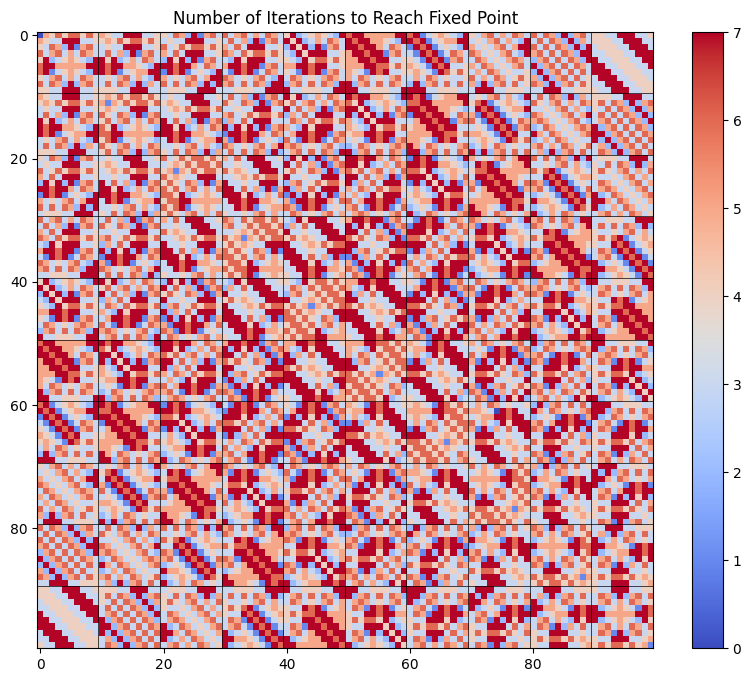

In [8]:
# reshape counts into a 2D grid
data = np.array([0] + kaprekar_iteration_counts(4))  
reshaped_data = data.reshape((100, 100))

# plot the grid
plt.figure(figsize=(10, 8))
plt.imshow(reshaped_data, cmap='coolwarm', vmin=0, vmax=7, aspect='equal')
plt.title("Number of Iterations to Reach Fixed Point")
plt.colorbar();

# grid lines
plt.gca().set_xticks(np.arange(10-0.6, 90, 10), minor=True)
plt.gca().set_yticks(np.arange(10-0.6, 90, 10), minor=True)
plt.gca().grid(which='minor', color='black', linewidth=0.5, alpha=1)
plt.gca().tick_params(axis='both', which='minor', length=0);

In [9]:
# Reinitialize the array with all numbers from 1 to 9999, with zero-padding considered
numbers = np.arange(1, 10000)

# Re-run the process with the updated range of numbers
row_data = []
# results_df = pd.DataFrame(columns=['Iteration', 'Unique Values', 'Unique Sorted Values'])

# Perform up to 7 iterations of the Kaprekar procedure
for i in range(0, 8):
    numbers = np.array([ x for x in numbers if not identical_digits(x, 4) ])
    unique_values_count = len(np.unique(numbers))
    unique_sorted_values_count = len(np.unique([sort_digits(n, 4) for n in numbers]))
    numbers_mean = np.mean(numbers)
    numbers_std = np.std(numbers)
    numbers_max = np.max(numbers)
    numbers_min = np.min(numbers)
                         
    # Record the counts in the DataFrame
    row_data.append({
        'Iteration': i,
        'Unique Values': unique_values_count,
        'Unique Sorted Values': unique_sorted_values_count,
        'Mean': numbers_mean,
        'Std. Dev.': numbers_std,
        'Max': numbers_max,
        'Min': numbers_min,
    })
    # Apply the Kaprekar function to each element in the array
    numbers = np.vectorize(k)(numbers)

# Display the DataFrame
results_df = pd.DataFrame(row_data)
results_df


,Iteration,Unique Values,Unique Sorted Values,Mean,Std. Dev.,Max,Min
0,0,9990,705,4999.500000,2886.430596,9998,1
1,1,54,30,6113.562162,2044.904197,9801,999
2,2,20,17,6643.637838,1747.398797,9621,1089
3,3,14,12,5843.443243,1721.184042,9621,1998
4,4,10,8,5894.248649,1622.963317,8532,1998
5,5,7,5,6182.259459,1230.052241,8532,3087
6,6,4,2,6197.740541,997.305005,8532,4176
7,7,1,1,6174.000000,0.000000,6174,6174


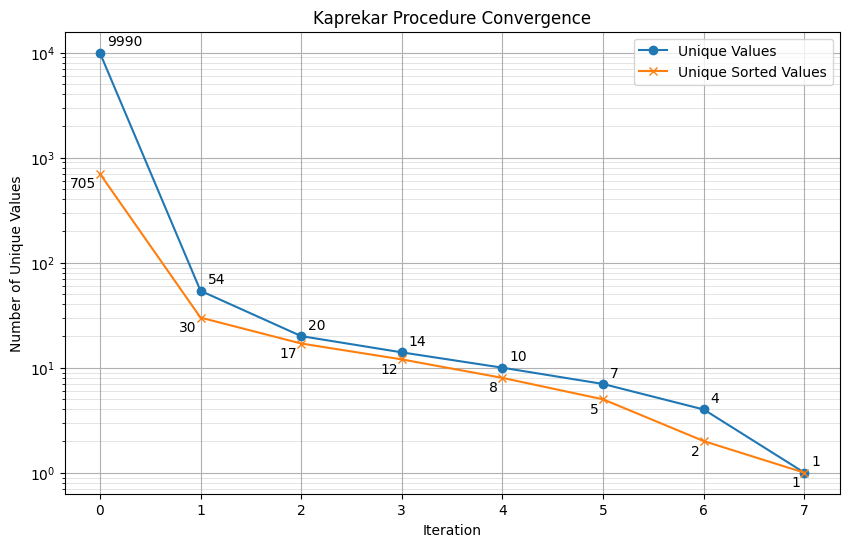

In [10]:
# Plotting the 'Unique Values' and 'Unique Sorted Values' on the same chart
plt.figure(figsize=(10, 6))

plt.plot(results_df['Iteration'], results_df['Unique Values'], label='Unique Values', marker='o')
plt.plot(results_df['Iteration'], results_df['Unique Sorted Values'], label='Unique Sorted Values', marker='x')

plt.title('Kaprekar Procedure Convergence')
plt.xlabel('Iteration')
plt.ylabel('Number of Unique Values')
plt.xticks(results_df['Iteration'].astype(int))  # Ensure x-ticks are integer values
plt.yscale('log')
plt.legend()
plt.grid('major')
plt.grid(which='minor', linewidth='0.5', color='grey', alpha=0.3)

# data labels
for i, data_label in enumerate(results_df['Unique Values']):
    plt.annotate(
        data_label,
        xy=(results_df['Iteration'][i], results_df['Unique Values'][i]),
        textcoords="offset points", xytext=(5, 5), ha='left')

for i, data_label in enumerate(results_df['Unique Sorted Values']):
    plt.annotate(
        data_label,
        xy=(results_df['Iteration'][i], results_df['Unique Sorted Values'][i]),
        textcoords="offset points", 
        xytext=(-3, -10),
        ha='right')

# Show the plot
plt.show()


In [11]:
np.unique(numbers)

array([6174])

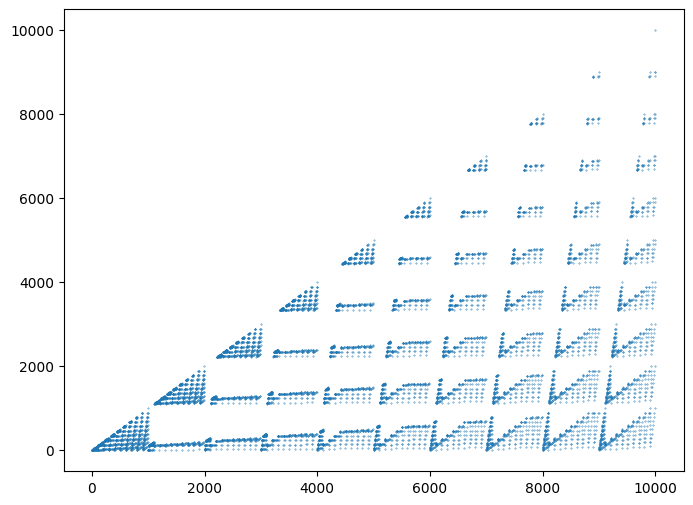

In [12]:
xs = np.arange(0, 10_000)
ys = sorted_numbers = [ int(sort_digits(x, 4)) for x in xs ]

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, s=0.1)


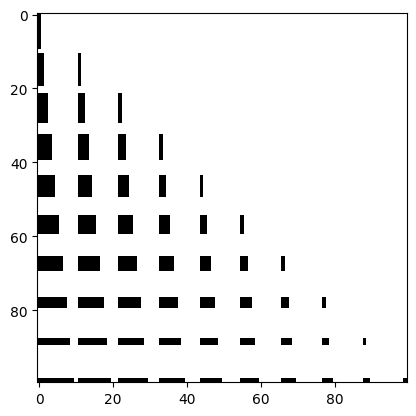

In [13]:
digits_are_sorted_grid = np.zeros(shape=(100, 100))
for y in ys:
    digits_are_sorted_grid[y % 100][y // 100] = 1
plt.imshow(digits_are_sorted_grid, cmap='Greys', vmin=0, vmax=1, aspect='equal')

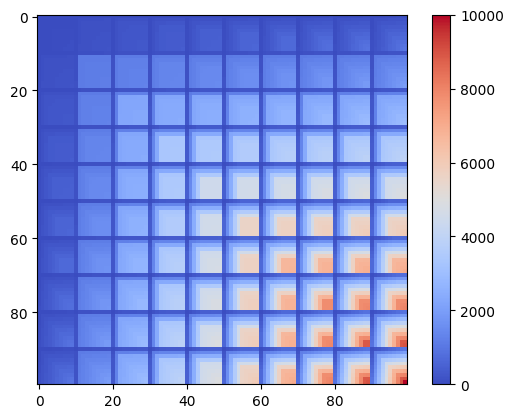

In [14]:
plt.imshow(np.array(ys).reshape( (100, 100) ), cmap='coolwarm', vmin=0, vmax=len(ys), aspect='equal');
plt.colorbar();

In [15]:
def digits_sortedness(n: int, length=4) -> int:
    score = 0
    digits = str(n).zfill(length)
    
    for i in range(1, len(digits)):
        if digits[i] >= digits[i - 1]:
            score += 1
    
    return score

assert digits_sortedness(1234) == 3
assert digits_sortedness(4321) == 0
assert digits_sortedness(3322) == 2
assert digits_sortedness(4398) == 1
assert digits_sortedness(1) == 3

sortedness = np.array([digits_sortedness(n) for n in range(10_000)])
sortedness_grid = sortedness.reshape(100, 100)
sortedness_grid.shape

(100, 100)

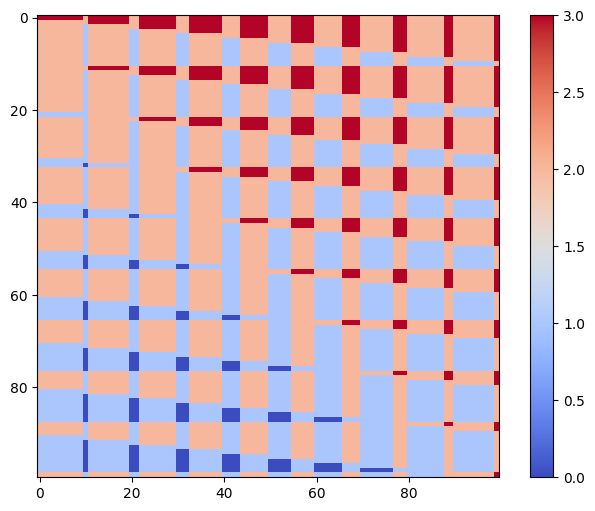

In [16]:
plt.figure(figsize=(8, 6))
plt.imshow(sortedness_grid, cmap='coolwarm', vmin=0, vmax=3, aspect='equal')
plt.colorbar();

In [17]:
np.where(data==1)

(array([  26,   62,  136,  163,  206,  246,  260,  264,  316,  356,  361,
         365,  426,  462,  466,  536,  563,  602,  613,  620,  624,  631,
         635,  642,  646,  653,  664, 1036, 1063, 1111, 1137, 1173, 1247,
        1274, 1306, 1317, 1357, 1360, 1371, 1375, 1427, 1467, 1472, 1476,
        1537, 1573, 1577, 1603, 1630, 1647, 1674, 1713, 1724, 1731, 1735,
        1742, 1746, 1753, 1757, 1764, 1775, 2006, 2046, 2060, 2064, 2147,
        2174, 2222, 2248, 2284, 2358, 2385, 2406, 2417, 2428, 2460, 2468,
        2471, 2482, 2486, 2538, 2578, 2583, 2587, 2600, 2604, 2640, 2648,
        2684, 2688, 2714, 2741, 2758, 2785, 2824, 2835, 2842, 2846, 2853,
        2857, 2864, 2868, 2875, 2886, 3016, 3056, 3061, 3065, 3106, 3117,
        3157, 3160, 3171, 3175, 3258, 3285, 3333, 3359, 3395, 3469, 3496,
        3506, 3517, 3528, 3539, 3560, 3571, 3579, 3582, 3593, 3597, 3601,
        3605, 3610, 3649, 3650, 3689, 3694, 3698, 3711, 3715, 3751, 3759,
        3795, 3799, 3825, 3852, 3869, 

In [18]:
data[3953], data[3852], data[3751], data[3650]

(1, 1, 1, 1)

In [19]:
k(3953)

6174

In [20]:
sevens = np.where(data==7)[0]
sevens[ sevens % 100 == 50 ]

array([ 150,  250,  850,  950, 1050, 1250, 1350, 1950, 2050, 2150, 2350,
       2450, 3150, 3250, 3450, 3550, 4250, 4350, 4550, 4650, 5350, 5450,
       6450, 6650, 8050, 9050, 9150, 9950], dtype=int64)

In [21]:
data[5350], data[5451]

(7, 7)

In [22]:
data[5350], data[5449]

(7, 7)

In [23]:
start = np.array([40, 18])
end = np.array([496, 475])
def coord(point):
    length = end - start
    return np.round(100 * (np.array(point) - start)/length)
    
coord(np.array([269, 226]))


array([50., 46.])

In [24]:
# diagonal
#streak = [4945, 5046, 5147, 5248, 5349, 5450]
streak = [5046, 5147, 5248, 5349]
print('sorted:', [sort_digits(n, 4) for n in streak])
for index in streak:
    assert data[index] == 7

print([ k(n) for n in streak ])
print([ k(k(n)) for n in streak ])
print([ k(k(k(n))) for n in streak ])
print([ k(k(k(k(n)))) for n in streak ])
print([ k(k(k(k(k(n))))) for n in streak ])
print([ k(k(k(k(k(k(n)))))) for n in streak ])
print([ k(k(k(k(k(k(k(n))))))) for n in streak ])

sorted: ['0456', '1457', '2458', '3459']
[6084, 6084, 6084, 6084]
[8172, 8172, 8172, 8172]
[7443, 7443, 7443, 7443]
[3996, 3996, 3996, 3996]
[6264, 6264, 6264, 6264]
[4176, 4176, 4176, 4176]
[6174, 6174, 6174, 6174]


In [25]:
#  7541
# -1457
# -----
#  6084

#  8542
# -2458
# -----
#  6048

In [26]:
k(9543) 

6084

In [27]:
xs = sorted_valid_numbers
ukx = np.unique([k(x) for x in xs])
print(ukx.shape)
ukx

(54,)


array([ 999, 1089, 1998, 2088, 2178, 2997, 3087, 3177, 3267, 3996, 4086,
       4176, 4266, 4356, 4995, 5085, 5175, 5265, 5355, 5445, 5994, 6084,
       6174, 6264, 6354, 6444, 6534, 6993, 7083, 7173, 7263, 7353, 7443,
       7533, 7623, 7992, 8082, 8172, 8262, 8352, 8442, 8532, 8622, 8712,
       8991, 9081, 9171, 9261, 9351, 9441, 9531, 9621, 9711, 9801])

In [28]:
np.unique([int(sort_digits(k(x), 4)) for x in xs])

array([ 189,  288,  378,  468,  558,  999, 1179, 1269, 1278, 1359, 1377,
       1449, 1467, 1557, 1899, 2268, 2358, 2367, 2448, 2466, 2556, 2799,
       3357, 3447, 3456, 3555, 3699, 4446, 4455, 4599])

In [29]:
ukkx = np.unique([ k(x) for x in ukx ])
print(ukkx.shape)
print(np.unique([int(sort_digits(x, 4)) for x in ukkx]).shape)
print('missing:', set(ukkx) - set(ukx))

(20,)
(17,)
missing: set()


In [30]:
arrows = set()
for x in ukx:
    arrows.add(f'{x} -> {k(x)}')

print('digraph G {')
for arrow in arrows:
    print('   ', arrow)
print('}')

digraph G {
    999 -> 8991
    2997 -> 7173
    5175 -> 5994
    6534 -> 3087
    9441 -> 7992
    5994 -> 5355
    9801 -> 9621
    3177 -> 6354
    6993 -> 6264
    8262 -> 6354
    8442 -> 5994
    4995 -> 5355
    8352 -> 6174
    2088 -> 8532
    7992 -> 7173
    2178 -> 7443
    3087 -> 8352
    1089 -> 9621
    4356 -> 3087
    5085 -> 7992
    8082 -> 8532
    3996 -> 6264
    7443 -> 3996
    5355 -> 1998
    9081 -> 9621
    8172 -> 7443
    6444 -> 1998
    7173 -> 6354
    9171 -> 8532
    7623 -> 5265
    9261 -> 8352
    9351 -> 8172
    5265 -> 3996
    8622 -> 6354
    8991 -> 8082
    9711 -> 8532
    6354 -> 3087
    3267 -> 5265
    6174 -> 6174
    4086 -> 8172
    6084 -> 8172
    4266 -> 4176
    9531 -> 8172
    4176 -> 6174
    8532 -> 6174
    1998 -> 8082
    9621 -> 8352
    7263 -> 5265
    8712 -> 7443
    7533 -> 4176
    5445 -> 1089
    7353 -> 4176
    7083 -> 8352
    6264 -> 4176
}


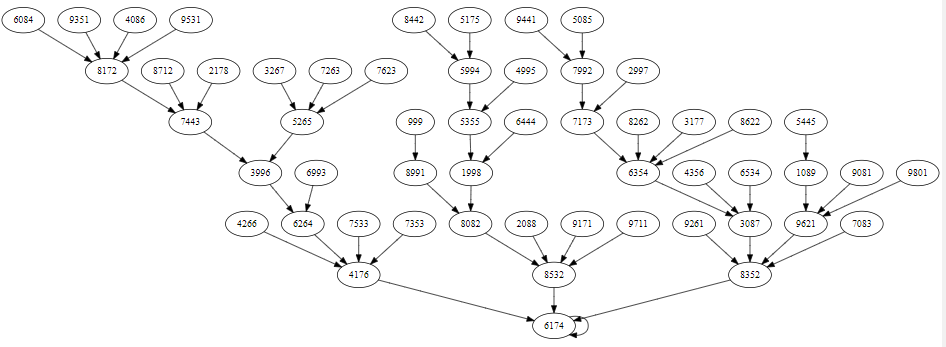

In [31]:
# Display an image from a local file
Image(filename='data/kaprekar_graph.png')

In [32]:
import colorsys

def hsl_to_rgb(h, s, l):
    """Convert HSL color space to RGB color space."""
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return int(r * 255), int(g * 255), int(b * 255)

def generate_pastel_colors(count=32):
    """Generate pastel colors in RGB format."""
    colors = []
    for i in range(count):
        hue = i / count  # Vary the hue between 0 and 1
        saturation = 0.5  # Fixed saturation
        lightness = 0.7  # Fixed lightness for pastel tones
        rgb = hsl_to_rgb(hue, saturation, lightness)
        colors.append(f'#{rgb[0]:02x}{rgb[1]:02x}{rgb[2]:02x}')  # Convert to hex format
    return colors

# Generate 20 unique pastel colors
pastel_colors = generate_pastel_colors()
print(pastel_colors)

['#d88c8c', '#d89a8c', '#d8a88c', '#d8b78c', '#d8c58c', '#d8d38c', '#cfd88c', '#c0d88c', '#b2d88c', '#a4d88c', '#95d88c', '#8cd891', '#8cd89f', '#8cd8ad', '#8cd8bc', '#8cd8ca', '#8cd8d8', '#8ccad8', '#8cbcd8', '#8cadd8', '#8c9fd8', '#8c91d8', '#958cd8', '#a48cd8', '#b28cd8', '#c08cd8', '#cf8cd8', '#d88cd3', '#d88cc5', '#d88cb7', '#d88ca8', '#d88c9a']


In [33]:
# Function to calculate the sum of digits
def sum_of_digits(n):
    return sum(int(d) for d in str(n))

# Initialize the unique colors set and the arrows set
unique_colors = set()
arrows = set()

# Generate the 'ukx' array with unique Kaprekar values
ukx = np.unique([k(x, 4) for x in range(1, 10000) if not identical_digits(x, 4)])

# Map each unique color number to a color
color_map = {}

# Predefined color list
#color_list = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'gold']
color_list = pastel_colors

for x in ukx:
    color_number = sort_digits(x, 4)
    if color_number not in color_map:
        color_map[color_number] = color_list[len(color_map) % len(color_list)]
    color = color_map[color_number]
    arrows.add(f'{x} [fillcolor="{color}", style=filled]')
    arrows.add(f'{x} -> {k(x)}')

# Create and print the graph definition
print('digraph G {')
for arrow in arrows:
    print('   ', arrow)
print('}')


digraph G {
    6354 [fillcolor="#8cd8ad", style=filled]
    2997 -> 7173
    7533 [fillcolor="#8c91d8", style=filled]
    6534 -> 3087
    9801 -> 9621
    8442 -> 5994
    2178 -> 7443
    2178 [fillcolor="#d8c58c", style=filled]
    4176 [fillcolor="#8cd891", style=filled]
    1089 -> 9621
    3267 [fillcolor="#b2d88c", style=filled]
    3996 [fillcolor="#a4d88c", style=filled]
    9081 -> 9621
    4356 [fillcolor="#8cd8ad", style=filled]
    8172 -> 7443
    7173 -> 6354
    6993 [fillcolor="#a4d88c", style=filled]
    9261 -> 8352
    8622 -> 6354
    7173 [fillcolor="#c0d88c", style=filled]
    6174 -> 6174
    3177 [fillcolor="#c0d88c", style=filled]
    5085 [fillcolor="#8cd8ca", style=filled]
    1998 -> 8082
    4995 [fillcolor="#8cd8bc", style=filled]
    9621 -> 8352
    8712 -> 7443
    6174 [fillcolor="#8cd891", style=filled]
    6444 [fillcolor="#8c9fd8", style=filled]
    8262 -> 6354
    4995 -> 5355
    7992 -> 7173
    6534 [fillcolor="#8cd8ad", style=filled]
    508

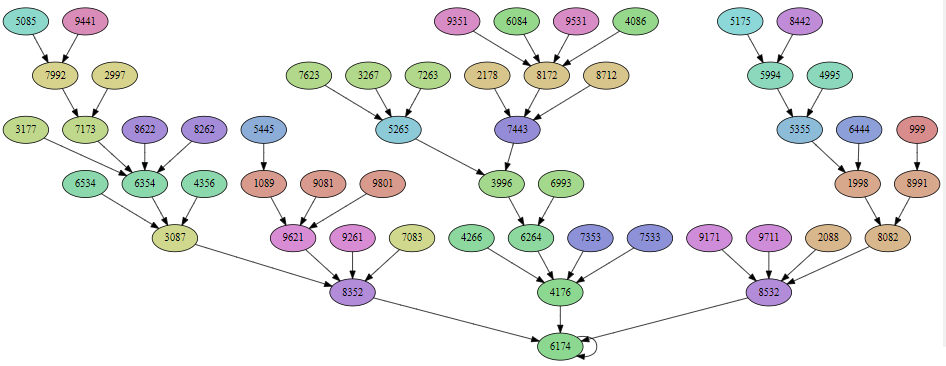

In [34]:
# Display an image from a local file
Image(filename='data/kaprekar_graph_colored.png')

In [11]:
k(k(2024))

6264

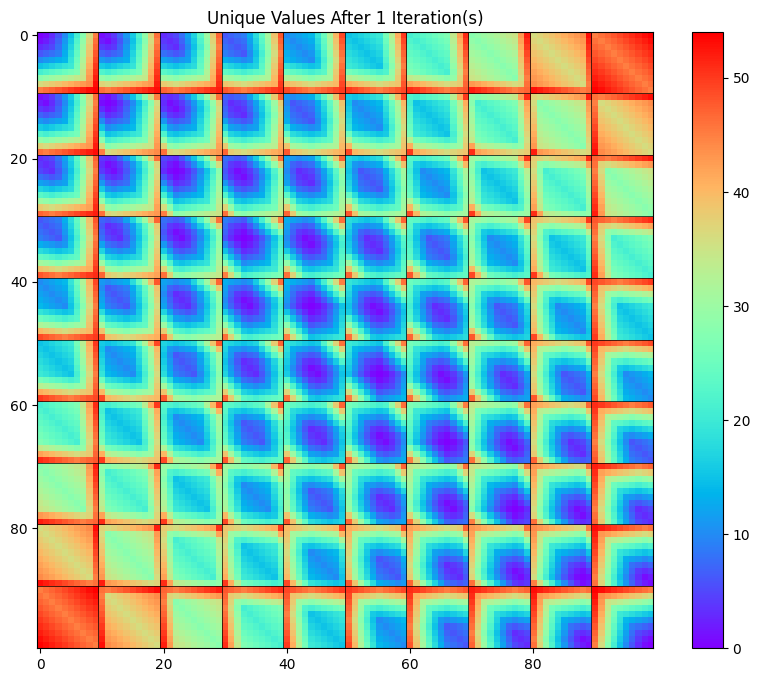

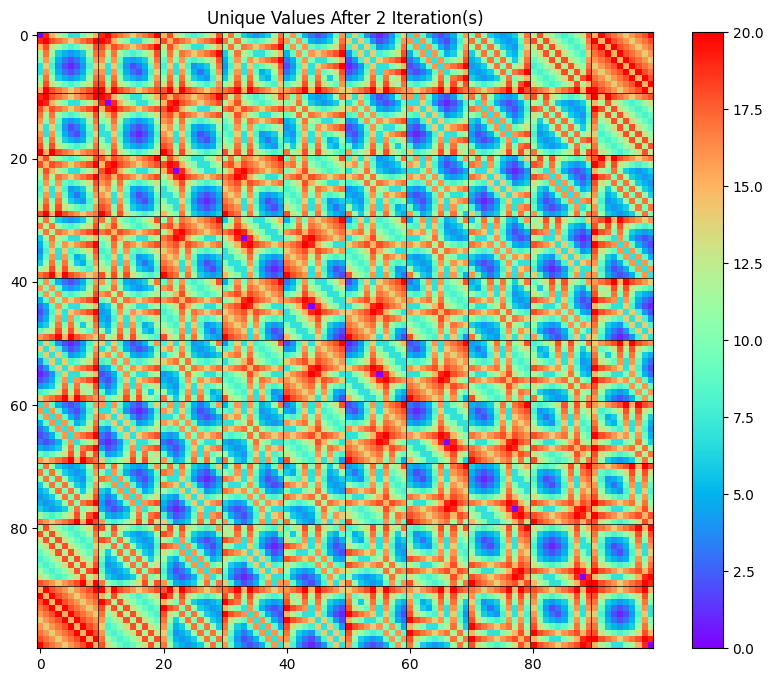

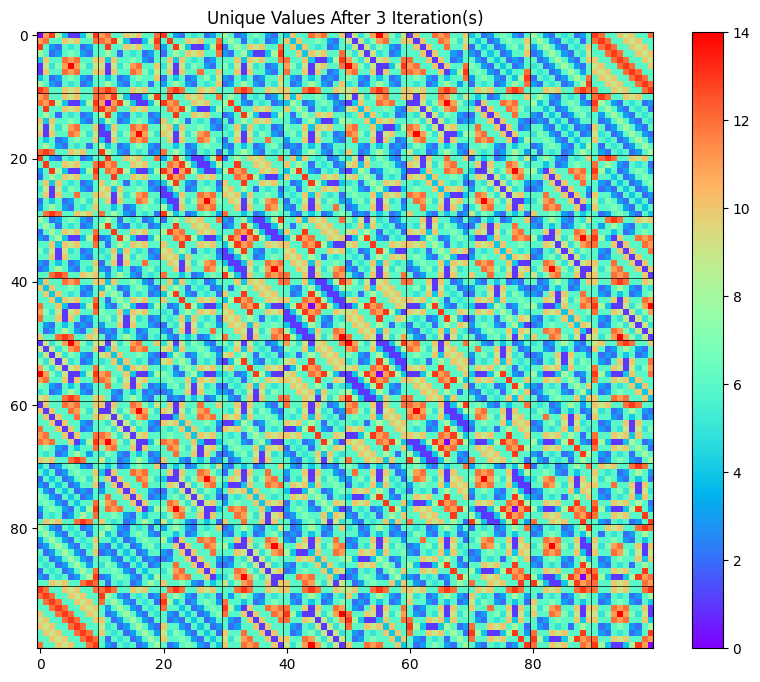

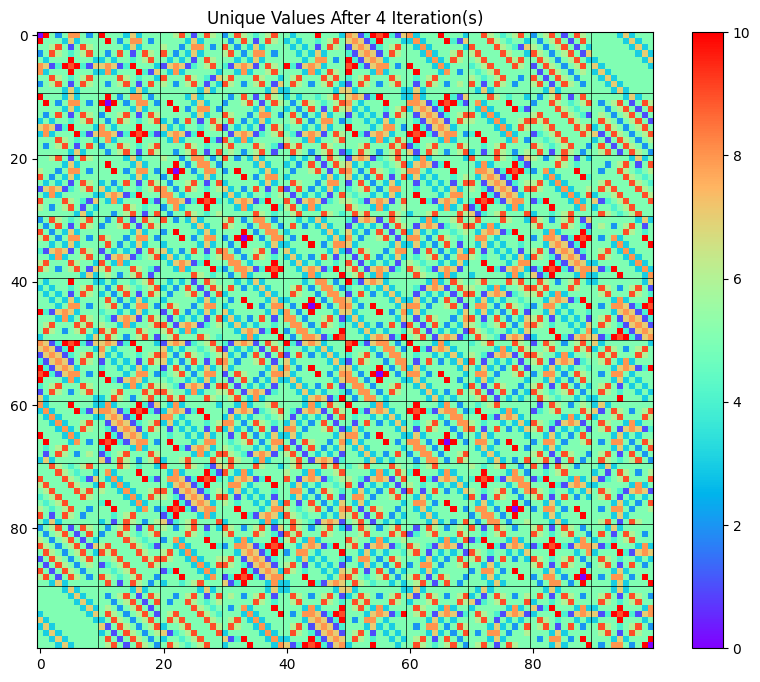

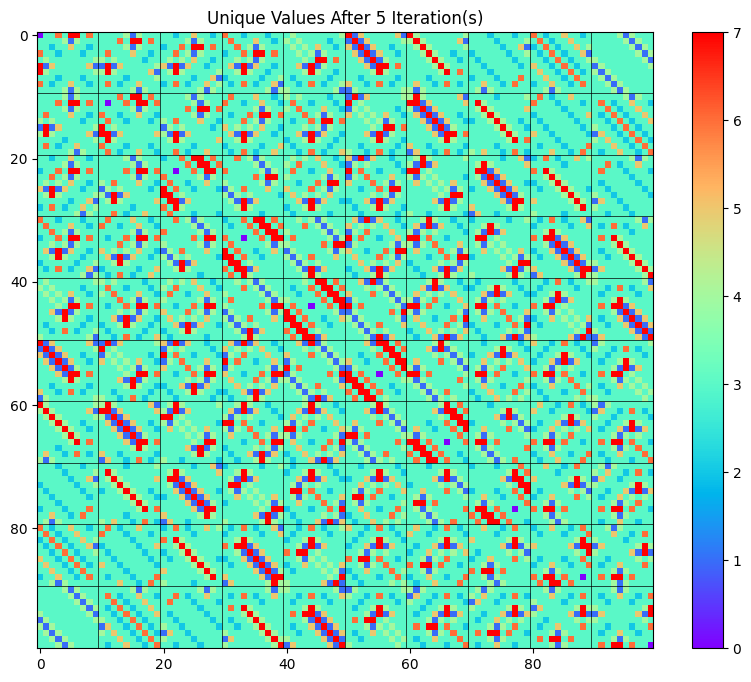

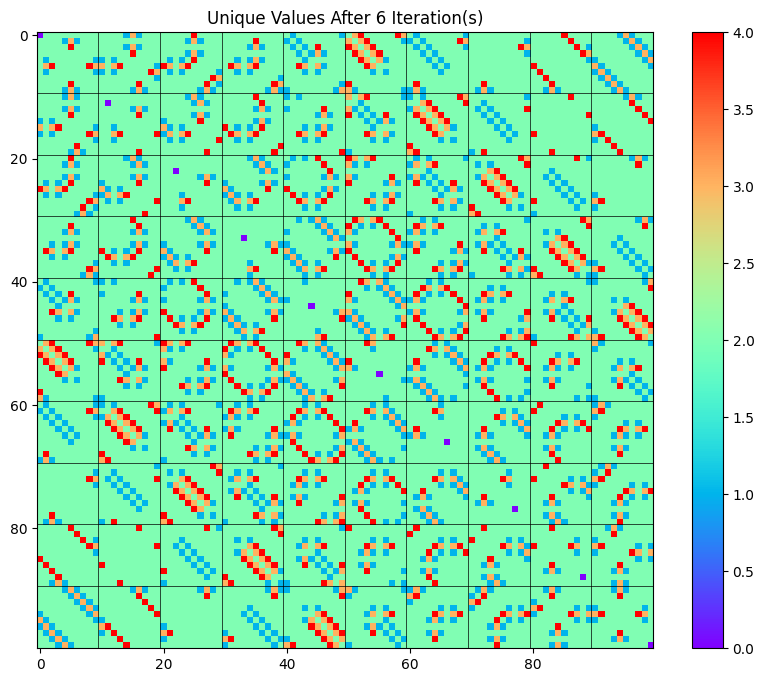

In [35]:
def fpow(f, x, n):
    for i in range(n):
        x = f(x)
    return x

frames = []
xs = np.arange(0, 10_000)
for n in range(1, 7):
    kx = np.array([fpow(k, x, n) for x in xs])
    ukx = np.unique(kx)
    kxi = np.array([ np.where(ukx == z) for z in kx])
    plt.figure(figsize=(10, 8), dpi=100)
    plt.imshow(kxi.reshape( (100, 100) ), cmap='rainbow', vmin=0, vmax=np.max(kxi), aspect='equal');

    # grid lines
    plt.gca().set_xticks(np.arange(10-0.6, 90, 10), minor=True)
    plt.gca().set_yticks(np.arange(10-0.6, 90, 10), minor=True)
    plt.gca().grid(which='minor', color='black', linewidth=0.5, alpha=1)
    plt.gca().tick_params(axis='both', which='minor', length=0)

    # chart annotations
    plt.colorbar();
    plt.title(f"Unique Values After {n} Iteration(s)")
    
    frame_filename = f'data/frame_{n}.png'
    plt.savefig(frame_filename)
    frames.append(frame_filename)
    plt.show()

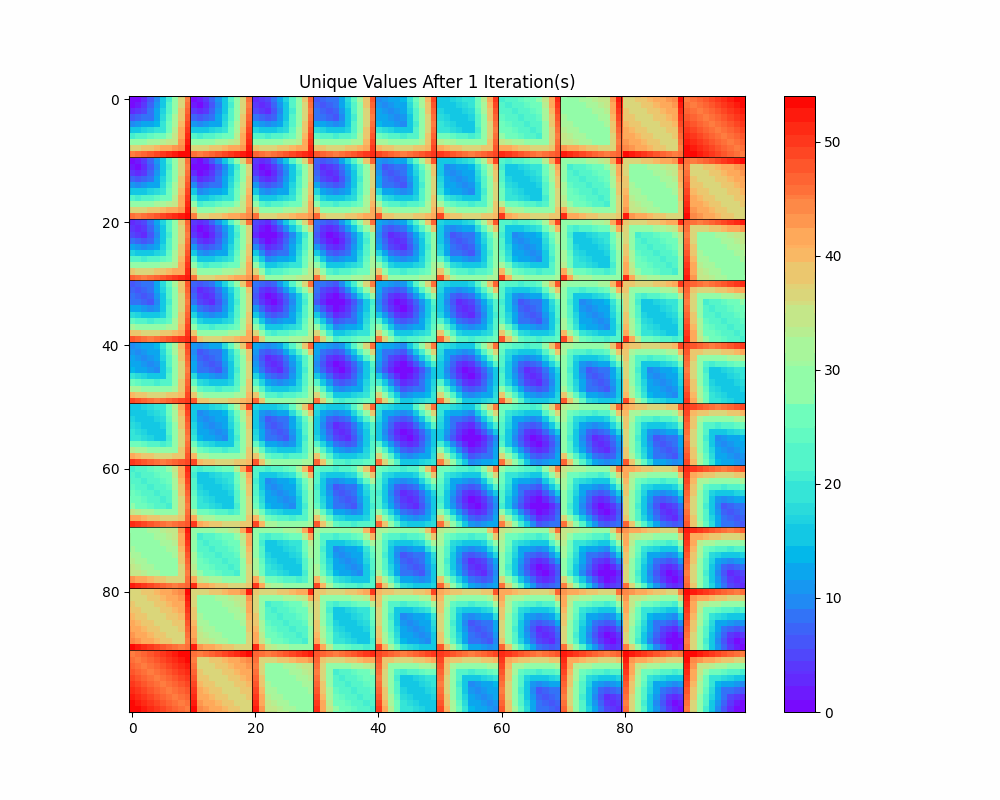

In [36]:
# Create an animated GIF
with PillowImage.open(frames[0]) as img:
    img.save('data/animation.gif', save_all=True, append_images=[PillowImage.open(f) for f in frames[1:]], duration=1000, loop=0)
Image(filename='data/animation.gif')

In [14]:
def are_diagonal(x, y, length=4) -> bool:
    if length != 4:
        raise NotImplementedError("only implemented for length=4 so far.")
        
    # Sort the digits of each number
    sorted_x = sort_digits(x, length=length)
    sorted_y = sort_digits(y, length=length)
    
    # Compute the differences between the sorted digits
    differences = [int(b) - int(a) for a, b in zip(sorted_x, sorted_y)]
    for d in differences:
        if abs(d) != 1:
            return False
    
    return all([ d1 == d2 for (d1, d2) in zip(differences, differences[::-1]) ])

# Example usage:
# are_diagonal(6084, 9351) should return True
assert are_diagonal(6084, 9351)
assert not are_diagonal(1234, 5678)

In [15]:
def find_diagonal_neighbors(x, length=4):
    if length != 4:
        raise NotImplementedError("only implemented for length=4 so far.")
        
    all_numbers = np.arange(1, 10000)
    valid_numbers = np.array([ num for num in all_numbers if not identical_digits(num, length) ])
    diagonal_neighbors = [ y for y in valid_numbers if are_diagonal(x, y, length) ]
    return diagonal_neighbors

In [16]:
find_diagonal_neighbors(1234)

[123,
 132,
 213,
 231,
 312,
 321,
 1023,
 1032,
 1203,
 1230,
 1302,
 1320,
 2013,
 2031,
 2103,
 2130,
 2301,
 2310,
 2345,
 2354,
 2435,
 2453,
 2534,
 2543,
 3012,
 3021,
 3102,
 3120,
 3201,
 3210,
 3245,
 3254,
 3425,
 3452,
 3524,
 3542,
 4235,
 4253,
 4325,
 4352,
 4523,
 4532,
 5234,
 5243,
 5324,
 5342,
 5423,
 5432]

In [39]:
all_numbers = np.arange(1, 10000)
valid_numbers = np.array([ num for num in all_numbers if not identical_digits(num, 4) ])
sorted_valid_numbers = np.unique(np.array([ int(sort_digits(x, 4)[::-1]) for x in valid_numbers ]))
len(sorted_valid_numbers)

705

In [40]:
count_misses = 0
count_hits = 0
neighbors = []

for z in sorted_valid_numbers:
    kz = k(z)
    for w in sorted_valid_numbers:
        if w < z and are_diagonal(z, w):
            kw = k(w)
            
            neighbors.append({ 'z': z, 'w': w, 'k(z)': kz, 'k(w)': kw })
            if kz != kw:
                print(f'z={z} w={w} k(z)={kz} k(w)={kw}')
                count_misses += 1
            else:
                count_hits += 1
                
print(f'hits: {count_hits}, misses: {count_misses}')
neighbors_df = pd.DataFrame(neighbors)

hits: 696, misses: 0


In [41]:
neighbors_df.sample(20)

,z,w,k(z),k(w)
441,8881,7770,6993,6993
100,6411,5300,5265,5265
24,4331,3220,2997,2997
691,9994,8883,4995,4995
393,8743,7632,5265,5265
35,4443,3332,999,999
615,9777,8886,1998,1998
626,9851,8740,8262,8262
251,7733,6622,4356,4356
694,9997,8886,1998,1998


In [18]:
assert are_diagonal(6084, 9351)
assert are_diagonal(8442, 5175)
assert are_diagonal(9441, 5085)
assert are_diagonal(7443, 5265)
assert are_diagonal(4266, 7533)
assert are_diagonal(8082, 9171)
assert are_diagonal(9261, 3087)
assert are_diagonal(7173, 8262)
assert are_diagonal(9441, 5085)
assert are_diagonal(8442, 5175)

In [19]:
N = 100_000
count_neighbors = 0
for i in range(N):
    x = np.random.choice(valid_numbers, replace=True)
    y = np.random.choice(valid_numbers, replace=True)
    count_neighbors += int(are_diagonal(x, y))
p_neighbors = count_neighbors / N
print(f'Percent Diagonal Neighbors: {p_neighbors*100:0.2f}%')   


Percent Diagonal Neighbors: 0.32%


In [20]:
N = 10_000
count_neighbors = 0
k_valid_numbers = np.unique(np.array([ k(x) for x in valid_numbers]))
print(len(k_valid_numbers))
for i in range(N):
    x = np.random.choice(k_valid_numbers, replace=True)
    y = np.random.choice(k_valid_numbers, replace=True)
    count_neighbors += int(are_diagonal(x, y))
p_neighbors = count_neighbors / N
print(f'Percent Diagonal Neighbors: {p_neighbors*100:0.2f}%')  

54
Percent Diagonal Neighbors: 2.07%


In [45]:
1 - (1 - 0.023)**54

0.7153531115320197

In [46]:
1 - (1 - 0.0032)**54

0.15892721017895906

In [48]:
# # digit histograms
# xs = valid_numbers
# for i in range(0, 8):
#     all_digits = list(''.join( str(x) for x in xs ))

#     # Create a list of counts for each digit from 0 to 9
#     counts = [all_digits.count(str(digit)) for digit in range(10)]   
#     plt.bar(range(10), counts)
#     plt.xlabel('Digit')
#     plt.ylabel('Frequency')
#     plt.title(f'Distribution of Digits after {i} Iteration(s)')
#     plt.xticks(range(10), [str(digit) for digit in range(10)])  # Set x-ticks to be the digits from 0 to 9
#     plt.show()
    
#     xs = np.unique(np.array([ k(x) for x in xs ]))

In [23]:
np.mean(np.array([ k(x) for x in valid_numbers]))

6113.562162162162